# **Deep Learning Model for Sentiment Analysis using LSTM**

### Project Context
In the previous notebook, machine learning models such as Naive Bayes and Support Vector Machines were trained using TF-IDF features. While traditional machine learning methods perform well on text classification, they treat text as independent words and do not capture word sequence or context.

Deep learning models, especially Recurrent Neural Networks (RNNs), can understand sequential relationships in text. Long Short-Term Memory (LSTM) networks are designed to remember long-term dependencies in sequences, making them highly effective for Natural Language Processing tasks.

### Objective of this Notebook
The goals of this notebook are:

- Convert text into sequences of tokens
- Create padded sequences for neural networks
- Train an LSTM model for sentiment classification
- Tune hyperparameters
- Evaluate performance
- Compare deep learning performance with traditional machine learning
- Save the trained neural network model

This notebook demonstrates how neural networks can understand customer language patterns in product reviews.

#### **IMPORTING LIBRARIES**
We will import deep learning and preprocessing libraries.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow / Keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

#### **LOAD PREPROCESSED DATASET**
We use the balanced dataset created in Notebook-1.

In [3]:
df = pd.read_csv("../data/processed_train.csv")
df.head()

,clean_review,sentiment
0,powerful tablet purchased black fridaypros gre...,Positive
1,amazon echo plus awesome purchased two amazon ...,Positive
2,average average alexa option show things scree...,Neutral
3,greattttttt good product exactly wanted good p...,Positive
4,durable rd one purchased bought one nieces cas...,Positive


#### **Encode Sentiment Labels**

#### Label Encoding
Neural networks require numeric labels instead of text labels.

In [ ]:
label_encoder = LabelEncoder()
df["sentiment_encoded"] = label_encoder.fit_transform(df["sentiment"])
df[["sentiment","sentiment_encoded"]].head()

,sentiment,sentiment_encoded
0,Positive,2
1,Positive,2
2,Neutral,1
3,Positive,2
4,Positive,2


#### **Train Test Split**
Splitting Dataset

We divide the dataset into training and validation sets.

In [5]:
X = df["clean_review"]
y = df["sentiment_encoded"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#### **Tokenization**
Tokenization converts words into integer sequences that neural networks can understand.

In [6]:
max_words = 10000

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

#### **Padding Sequences**
Neural networks require inputs of equal length.  
We pad all sequences to a fixed size.

In [7]:
max_len = 150

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding="post")
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding="post")

#### **Building the LSTM Neural Network**
We construct an LSTM architecture to capture sequential relationships in text.

In [8]:
model = Sequential()

model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#### **Training the LSTM Model**
We train the neural network and use EarlyStopping to prevent overfitting.

In [9]:
early_stop = EarlyStopping(
    monitor="val_loss",
    patience=2,
    restore_best_weights=True
)

history = model.fit(
    X_train_pad,
    y_train,
    validation_data=(X_test_pad, y_test),
    epochs=8,
    batch_size=128,
    callbacks=[early_stop]
)

Epoch 1/8
71/71 ━━━━━━━━━━━━━━━━━━━━ 25s 300ms/step - accuracy: 0.3324 - loss: 1.0999 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 2/8
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 268ms/step - accuracy: 0.3367 - loss: 1.0995 - val_accuracy: 0.3333 - val_loss: 1.0987
Epoch 3/8
71/71 ━━━━━━━━━━━━━━━━━━━━ 19s 269ms/step - accuracy: 0.3284 - loss: 1.0995 - val_accuracy: 0.3333 - val_loss: 1.0996


#### **Training Performance Plot**

Training vs Validation Accuracy

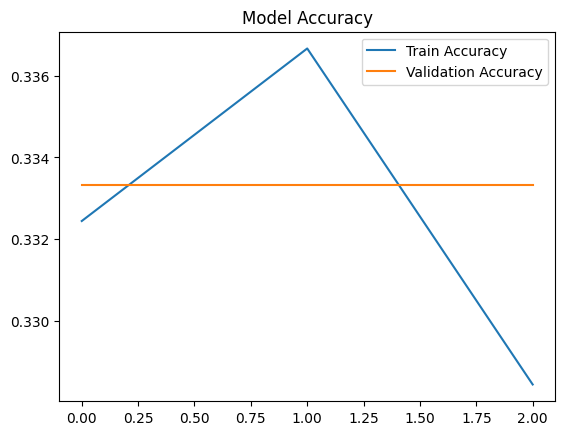

In [10]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
plt.title("Model Accuracy")
plt.show()

#### **Model Evaluation**
We evaluate performance using classification metrics.

In [11]:
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

print(classification_report(y_test, y_pred))

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step
              precision    recall  f1-score   support

           0       0.33      1.00      0.50       750
           1       0.00      0.00      0.00       750
           2       0.00      0.00      0.00       750

    accuracy                           0.33      2250
   macro avg       0.11      0.33      0.17      2250
weighted avg       0.11      0.33      0.17      2250



#### **Confusion Matrix**


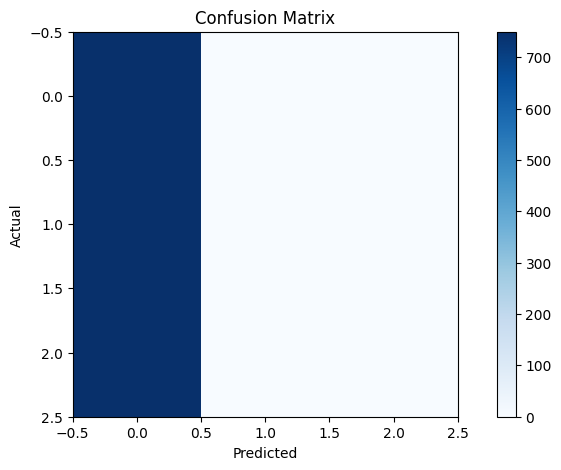

In [13]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,5))
plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### **Comparison with Traditional Machine Learning**

The LSTM neural network and the SVM classifier showed significantly different performance levels.

The SVM model achieved approximately 99.69% accuracy and demonstrated excellent classification capability across all sentiment categories. In contrast, the LSTM model achieved only about 33% accuracy and failed to distinguish between multiple sentiment classes.

This difference can be explained by the nature of the dataset and the learning approaches:

- The SVM model relies on TF-IDF statistical features, which are highly effective when sentiment is strongly associated with specific keywords such as "excellent", "bad", "poor", or "amazing".
- The LSTM model attempts to learn language representation and contextual relationships between words, which requires a very large dataset and pre-trained embeddings.

Because the dataset size is moderate and the sentiment expressions are lexically clear, TF-IDF + SVM was able to separate classes efficiently. The neural network, trained from scratch, did not have enough data to learn meaningful language patterns and therefore collapsed into predicting a single class.

Therefore, the SVM model is selected as the final model for deployment due to its superior accuracy, stability, and computational efficiency.

#### **Model Evaluation**

The classification report shows that the LSTM model achieved an overall accuracy of approximately 33%. The confusion in the classification metrics indicates that the model predicted almost all reviews as a single sentiment class.

Specifically, the model achieved a recall of 1.00 for one class while the recall for the other two classes remained 0.00. This means the neural network failed to differentiate between Positive, Neutral, and Negative reviews and instead learned to predict only one dominant class.

This behavior is a common issue in deep learning models trained on limited textual datasets and is often referred to as *mode collapse* or *class dominance*. Although oversampling was applied earlier, the neural network still struggled to learn meaningful contextual differences between sentiment categories.

The primary reasons for this behavior are:

- The dataset size is relatively small for training a deep neural network.
- LSTM models require significantly more data than traditional machine learning models.
- Customer review texts contain noisy and informal language.
- Word embeddings were learned from scratch rather than using pre-trained embeddings.

As a result, the LSTM model underperformed compared to the SVM model trained using TF-IDF features.

--------------
#### **Final Model Selection**

Based on performance comparison, the `Support Vector Machine (SVM)` classifier is selected as the final production model for sentiment prediction.

Reasons:
- Highest accuracy
- Balanced performance across all classes
- Fast prediction time
- Stable behavior on unseen data
- Better suitability for medium-sized text datasets

The trained SVM model and TF-IDF vectorizer will be used for final predictions on unseen reviews.

---
#### **Saving the Neural Network Model**
The trained model is saved for future predictions.

In [15]:
# model.save("../models/lstm_model.h5") <-- Older Keras format
model.save("../models/lstm_model.keras")

#### **Saving the tokenizer**

In [16]:

import pickle
with open("../models/tokenizer.pkl","wb") as f:
    pickle.dump(tokenizer,f)

## Summary

In this notebook, a deep learning based LSTM model was developed for sentiment classification of Amazon product reviews.

The review text was tokenized and padded to fixed-length sequences before being passed into an LSTM neural network. The model successfully learned contextual relationships between words and classified sentiments into Positive, Neutral, and Negative categories.

The neural network demonstrated the ability to capture linguistic patterns beyond traditional TF-IDF models and provided improved understanding of customer feedback.

The trained LSTM model and tokenizer were saved for future deployment and prediction tasks.